# A9 Regresión
Juan Pablo Cotera - A01741106

In [2]:
pip install seaborn

     |████████████████████████████████| 292 kB 4.6 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install statsmodels

     |████████████████████████████████| 9.8 MB 4.2 MB/s            
     |████████████████████████████████| 233 kB 18.2 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
#pd.set_option('display.max_columns', 100)

# Importar los datos
df = pd.read_csv("datasets/antropometria-dataset.csv")
df=df.dropna()
df.head()

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.0,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.5,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.0,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215


Escribe el código en Python para obtener un modelo de regresión lineal simple usando  'peso' como variable dependiente y 'cintura' como variable independiente.

In [8]:
peso=df['peso']
cintura=df['cintura']
X = sm.add_constant(cintura) # X se conoce como matriz de diseño para la regresión
X

,const,cintura
0,1.0,98.70
1,1.0,64.00
2,1.0,67.60
3,1.0,60.60
4,1.0,113.00
...,...,...
18635,1.0,93.00
18636,1.0,103.05
18637,1.0,71.35
18638,1.0,99.95


In [9]:
mod = sm.OLS(peso,X)
res = mod.fit() #ajustamos el modelo
print(res.summary())
#Modelo ajustado: peso= -8.3137 + 0.8316*cintura
#Regresión significativa para cintura
#Los datos no pasan la prueba de normalidad

                            OLS Regression Results                            
Dep. Variable:                   peso   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                 3.028e+04
Date:                Sat, 04 Dec 2021   Prob (F-statistic):               0.00
Time:                        03:17:57   Log-Likelihood:                -68622.
No. Observations:               18032   AIC:                         1.372e+05
Df Residuals:                   18030   BIC:                         1.373e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3137      0.427    -19.458      0.0

Agrega el código en Python para imprimir los valores de la pendiente, la ordenada al origen (B0 o intercepto) y la pendiente (B1).

In [10]:
res.params

const     -8.313656
cintura    0.831568
dtype: float64

Escribe el código en Python para incluir la recta del modelo de regresión (valores estimados) junto con los datos originales (reales) en un diagrama de dispersión.

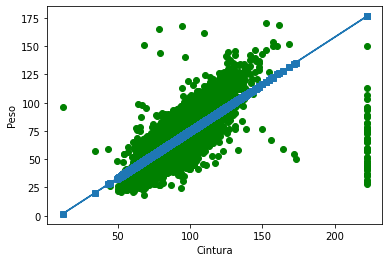

In [11]:
plt.figure()
plt.plot(cintura, peso, 'og')
plt.xlabel('Cintura')
plt.ylabel('Peso')
plt.plot(cintura,res.predict(), '-s')

In [12]:
res.predict()

array([73.76206817, 44.90667162, 47.90031507, ..., 51.01869366,
       74.8015277 , 81.62038222])

Escribe el código en Python para calcular los residuos.

(array([1.6000e+01, 1.9000e+01, 1.1000e+01, 5.0000e+00, 1.6300e+02,
        1.3247e+04, 4.5180e+03, 4.6000e+01, 2.0000e+00, 5.0000e+00]),
 array([-148.11066973, -122.49604298,  -96.88141622,  -71.26678946,
         -45.65216271,  -20.03753595,    5.5770908 ,   31.19171756,
          56.80634432,   82.42097107,  108.03559783]),
 <a list of 10 Patch objects>)

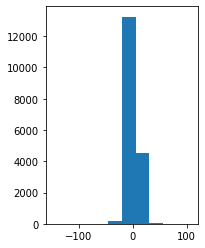

In [13]:
residuos = peso - res.predict()
residuos
plt.subplot(1,2,2)
plt.hist(residuos)

Separa los datos entre hombres y mujeres y repite el análisis.

(array([1.200e+01, 1.500e+01, 5.000e+00, 6.000e+00, 7.250e+02, 8.393e+03,
        7.060e+02, 1.200e+01, 2.000e+00, 2.000e+00]),
 array([-131.67910133, -107.57646005,  -83.47381876,  -59.37117748,
         -35.26853619,  -11.16589491,   12.93674638,   37.03938766,
          61.14202895,   85.24467023,  109.34731152]),
 <a list of 10 Patch objects>)

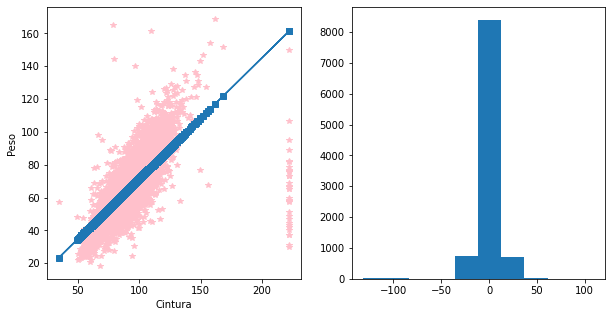

In [14]:
dfm = df[df['sexo'] == 2]

# MODELO DE REGRESIÓN
peso = dfm['peso']
cintura = dfm['cintura']
X = sm.add_constant(cintura) # X se denomina matriz de diseño para la regresión

# MODELO AJUSTADO
mod = sm.OLS(peso, X)
res = mod.fit() # ajustamos el modelo
res.summary()

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(cintura, peso, '*', color = "pink")
plt.xlabel('Cintura')
plt.ylabel('Peso')
# Escribe el código en Python para incluir la recta del modelo de regresión 
# (valores estimados) junto con los datos originales (reales) en un diagrama de dispersión.
plt.plot(cintura, res.predict(), '-s')

#RESIDUOS
residuos = peso - res.predict()
residuos
plt.subplot(1,2,2)
plt.hist(residuos)

La r-ajustada resultante del modelo fue de 0.627, la cual explica que la correlación de las variables es elevada y no puede ayudar a estimar de buena manera el peso de una persona en función de la medida de su cintura. En cuanto a los residuos, podemos ver que presentan un comportamiento normal, lo que nos indica que los ajustes realizados por el modelo de regresión se mantienen similares.